<a href="https://colab.research.google.com/github/aadhilajas/Python-Practice/blob/main/project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import files


uploaded = files.upload()

Saving CustomerChurn.csv to CustomerChurn.csv


In [9]:
# Import all necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [10]:
# Load the data
data = pd.read_csv(io.BytesIO(uploaded['CustomerChurn.csv']))

In [ ]:
print(data)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [ ]:
# Display the first few rows of the dataset
print(data.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [11]:
# Display information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Summary statistics of the dataset
print(data.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [ ]:
# Check for missing values
print(data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
# Columns
print(data.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [ ]:
# Datatype of total charges
print(data['TotalCharges'].dtype)

object


In [ ]:
# Convert 'TotalCharges' to numeric, coerce errors to NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [ ]:
# Check for null values
print(data[data['TotalCharges'].isnull()])

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ... 

In [ ]:
# Fill missing 'TotalCharges' with 0
data['TotalCharges'] = data['TotalCharges'].fillna(0)
print(data['TotalCharges'].isnull().sum())

0


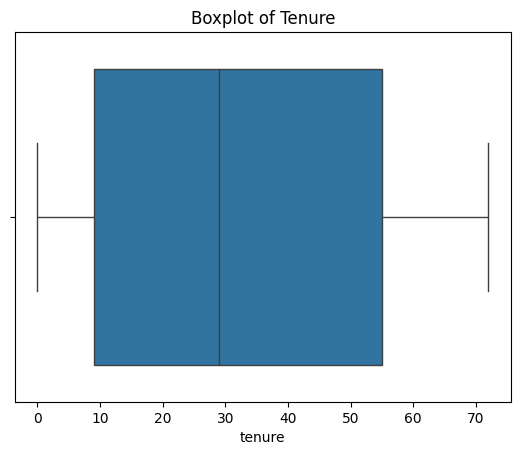

In [ ]:
# Exploratory Data Analysis
# Visualize distributions and relationships
sns.boxplot(x=data['tenure'])
plt.title('Boxplot of Tenure')
plt.show()

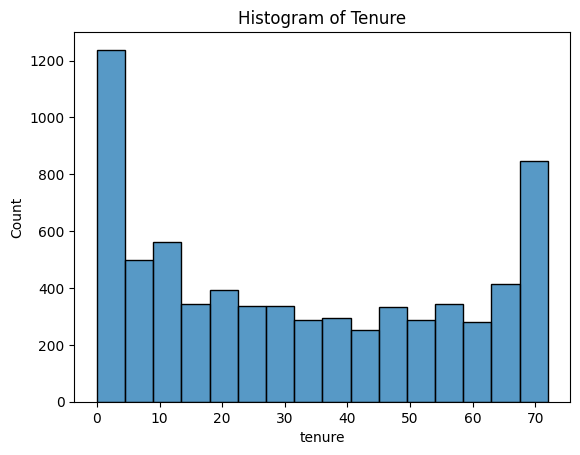

In [ ]:
# Histogram of tenure
sns.histplot(data['tenure'])
plt.title('Histogram of Tenure')
plt.show()

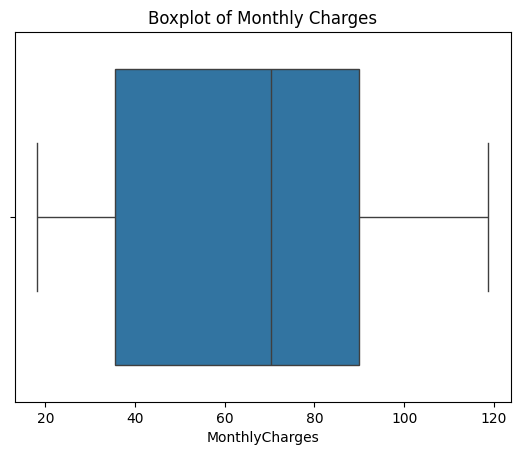

In [ ]:
# Boxplot
sns.boxplot(x=data['MonthlyCharges'])
plt.title('Boxplot of Monthly Charges')
plt.show()

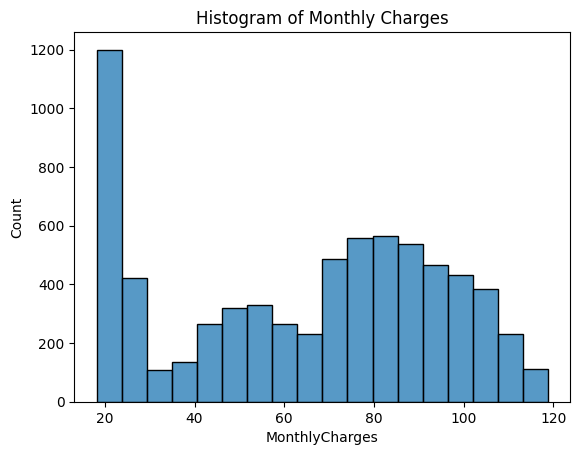

In [12]:
# Histogram of monthly charges
sns.histplot(data['MonthlyCharges'])
plt.title('Histogram of Monthly Charges')
plt.show()

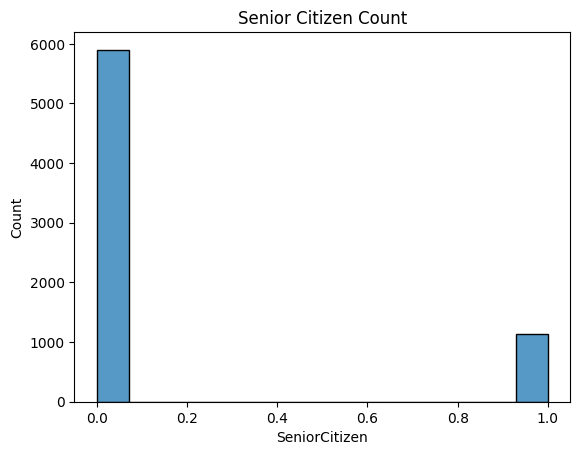

In [ ]:
# Senior citizen count
sns.histplot(data['SeniorCitizen'])
plt.title('Senior Citizen Count')
plt.show()

Analyzis   

Univar Analyzis

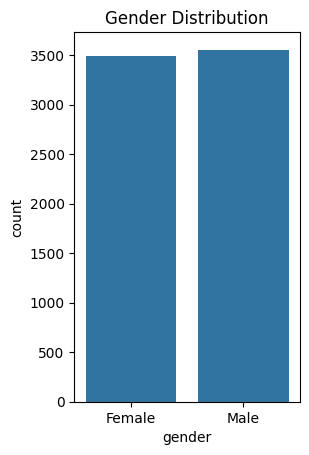

In [13]:
# Gender Distribution Among Customers
plt.subplot(1, 2, 2)
sns.countplot(x='gender', data=data)
plt.title('Gender Distribution')
plt.show()

Text(0, 0.5, 'Frequency')

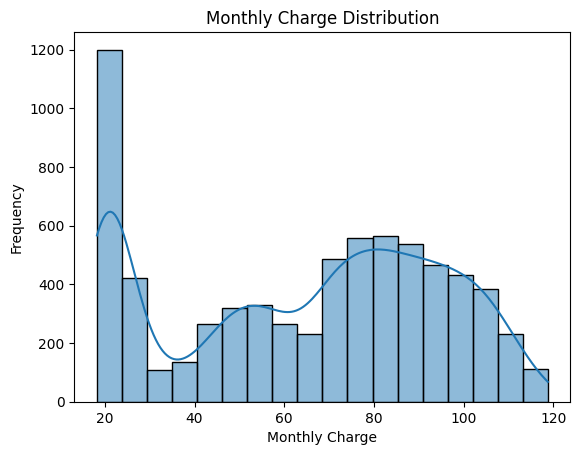

In [16]:
# Monthly Charge Distribution Among Customers
sns.histplot(data['MonthlyCharges'], kde=True)
plt.title('Monthly Charge Distribution')
plt.xlabel('Monthly Charge')
plt.ylabel('Frequency')

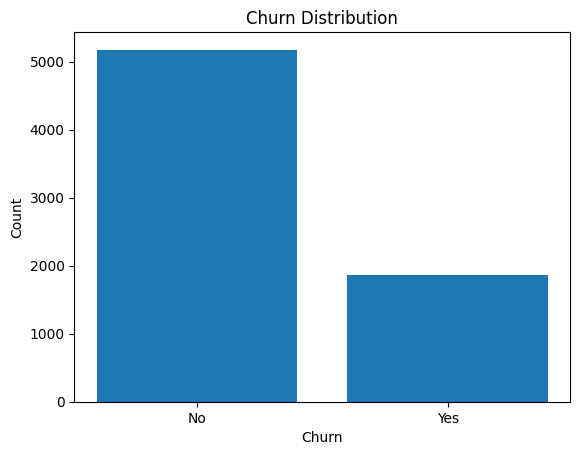

In [18]:
# Churn Count among Customers
churn_counts = data['Churn'].value_counts()

plt.bar(churn_counts.index, churn_counts.values)
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Distribution')
plt.xticks(['No', 'Yes'])

plt.show()

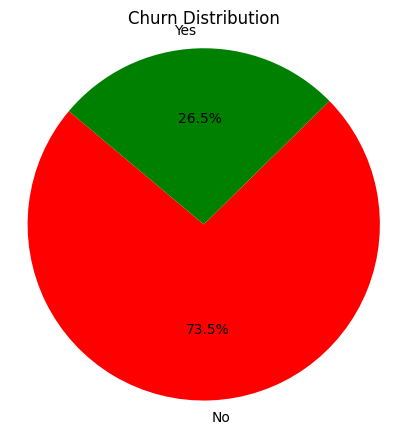

In [27]:
# Churn Distribution Among Customers
churn_counts = data['Churn'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=140, colors=['red', 'green'])
plt.title('Churn Distribution')
plt.axis('equal')
plt.show()

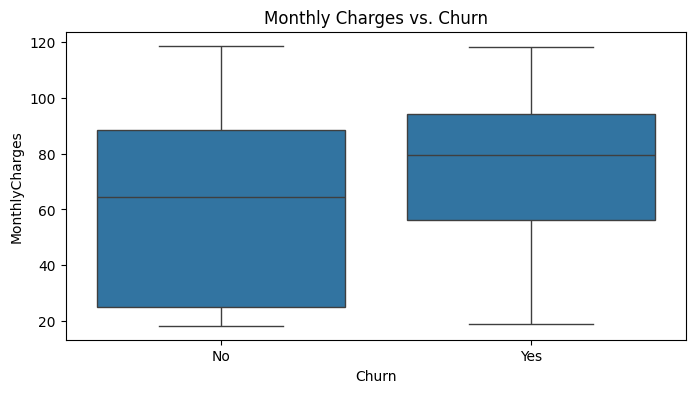

In [23]:
# MonthlyCharges and Churn to see how monthly charges vary between customers who churned and those who did not
plt.figure(figsize=(8, 4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title('Monthly Charges vs. Churn')
plt.show()

<Figure size 1000x500 with 0 Axes>

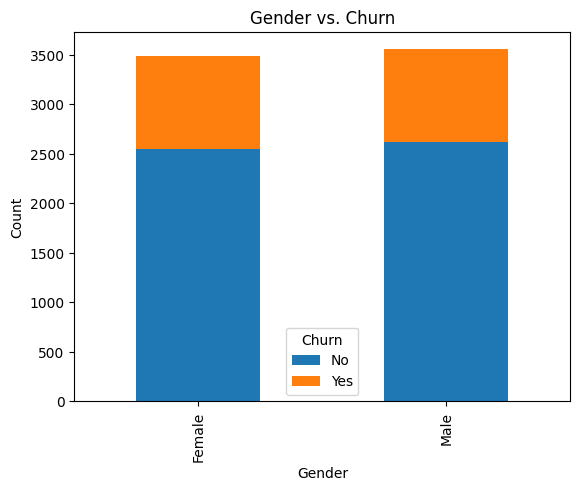

In [25]:
# Gender and Churn to see the distribution of churn across different genders
plt.figure(figsize=(10, 5))
gender_churn = pd.crosstab(data['gender'], data['Churn'])
gender_churn.plot(kind='bar', stacked=True)
plt.title('Gender vs. Churn')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

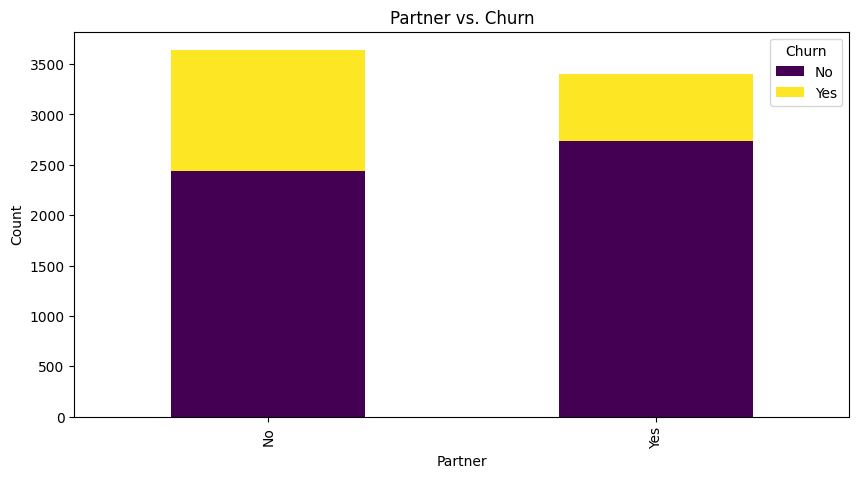

In [26]:
# Stacked bar plot to show the relationship between Partner and Churn.
plt.figure(figsize=(10, 5))
partner_churn = pd.crosstab(data['Partner'], data['Churn'])
partner_churn.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('Partner vs. Churn')
plt.xlabel('Partner')
plt.ylabel('Count')
plt.show()